In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_parquet('../data/processed/news-consolidated-v2.parquet')

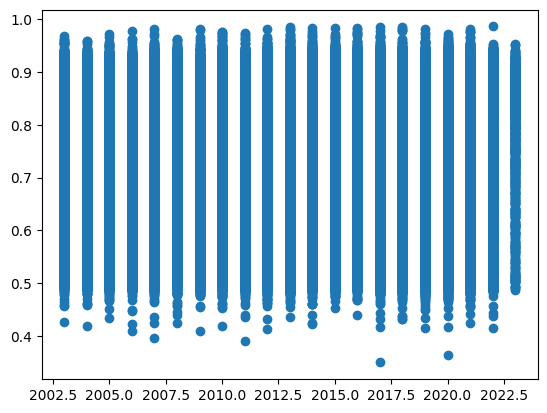

In [10]:
data = data.sort_values(by="date")
data["years"] = data["date"].dt.year
data = data[40:]
sentiment = data["sentiment_score"]
label = data["sentiment_label"]
plt.scatter(data["years"], sentiment)
plt.show()